In [1]:
# Import necessary packages
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
# Load the users_with_attributes dataframe
users_with_attributes = pd.read_pickle('pickle_dataframes/users_with_attributes.pkl')

In [3]:
# Display the dataframe
users_with_attributes

,Id,Reputation,CreationDate,LastAccessDate,Views,UpVotes,DownVotes,QuestionCount,AnswerCount,CommentCount,TotalActivity,AvgQuestionBodySentiment,AvgQuestionTitleSentiment,AvgAnswerSentiment,AvgCommentSentiment,AvgQuestionScore,AvgAnswerScore,AvgCommentScore,AcceptedAnswerCount,AcceptedAnswerFraction
0,-1,1,2012-12-04 20:12:06.337,2012-12-04 20:12:06.337,267,5442,6725,881.0,1320.0,8879.0,11080.0,0.182188,0.013791,0.178233,0.085863,6.820658,7.738636,1.578669,135.0,0.102273
5,5,315,2012-12-04 20:36:06.517,2021-07-05 18:03:41.037,49,14,58,0.0,3.0,31.0,34.0,0.000000,0.000000,0.185433,0.469406,NaN,7.000000,1.193548,1.0,0.333333
8,8,2777,2012-12-04 20:52:37.450,2022-07-31 22:39:03.850,832,37,5,0.0,13.0,10.0,23.0,0.000000,0.000000,0.689277,0.049030,NaN,20.230769,1.500000,7.0,0.538462
18,18,5325,2012-12-04 21:37:27.683,2013-12-18 15:57:41.670,427,110,11,16.0,20.0,65.0,101.0,0.661300,0.212294,0.287115,0.189645,13.562500,13.700000,0.769231,10.0,0.500000
23,23,16227,2012-12-04 21:49:39.360,2015-02-14 02:38:09.917,1449,803,54,36.0,124.0,277.0,437.0,0.381967,0.141828,0.374322,0.199965,13.361111,7.782258,1.321300,44.0,0.354839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37644,46025,141,2023-03-19 12:16:59.447,2023-06-27 09:27:37.477,50,0,0,2.0,0.0,16.0,18.0,0.159400,0.000000,0.000000,-0.111800,-2.000000,NaN,0.000000,NaN,NaN
37863,46253,251,2023-04-07 18:35:35.903,2023-07-22 21:32:54.697,6,3,9,0.0,6.0,10.0,16.0,0.000000,0.000000,0.666883,-0.105290,NaN,1.833333,1.200000,NaN,NaN
38111,46524,448,2023-05-17 19:13:21.650,2023-08-19 21:16:59.250,100,37,31,8.0,0.0,15.0,23.0,0.181063,0.299013,0.000000,0.189967,2.250000,NaN,0.600000,NaN,NaN
38246,46665,597,2023-06-07 21:14:53.120,2023-08-17 09:54:23.023,3,0,0,2.0,6.0,11.0,19.0,0.620450,0.255300,-0.036367,0.034573,6.500000,5.333333,0.727273,2.0,0.333333


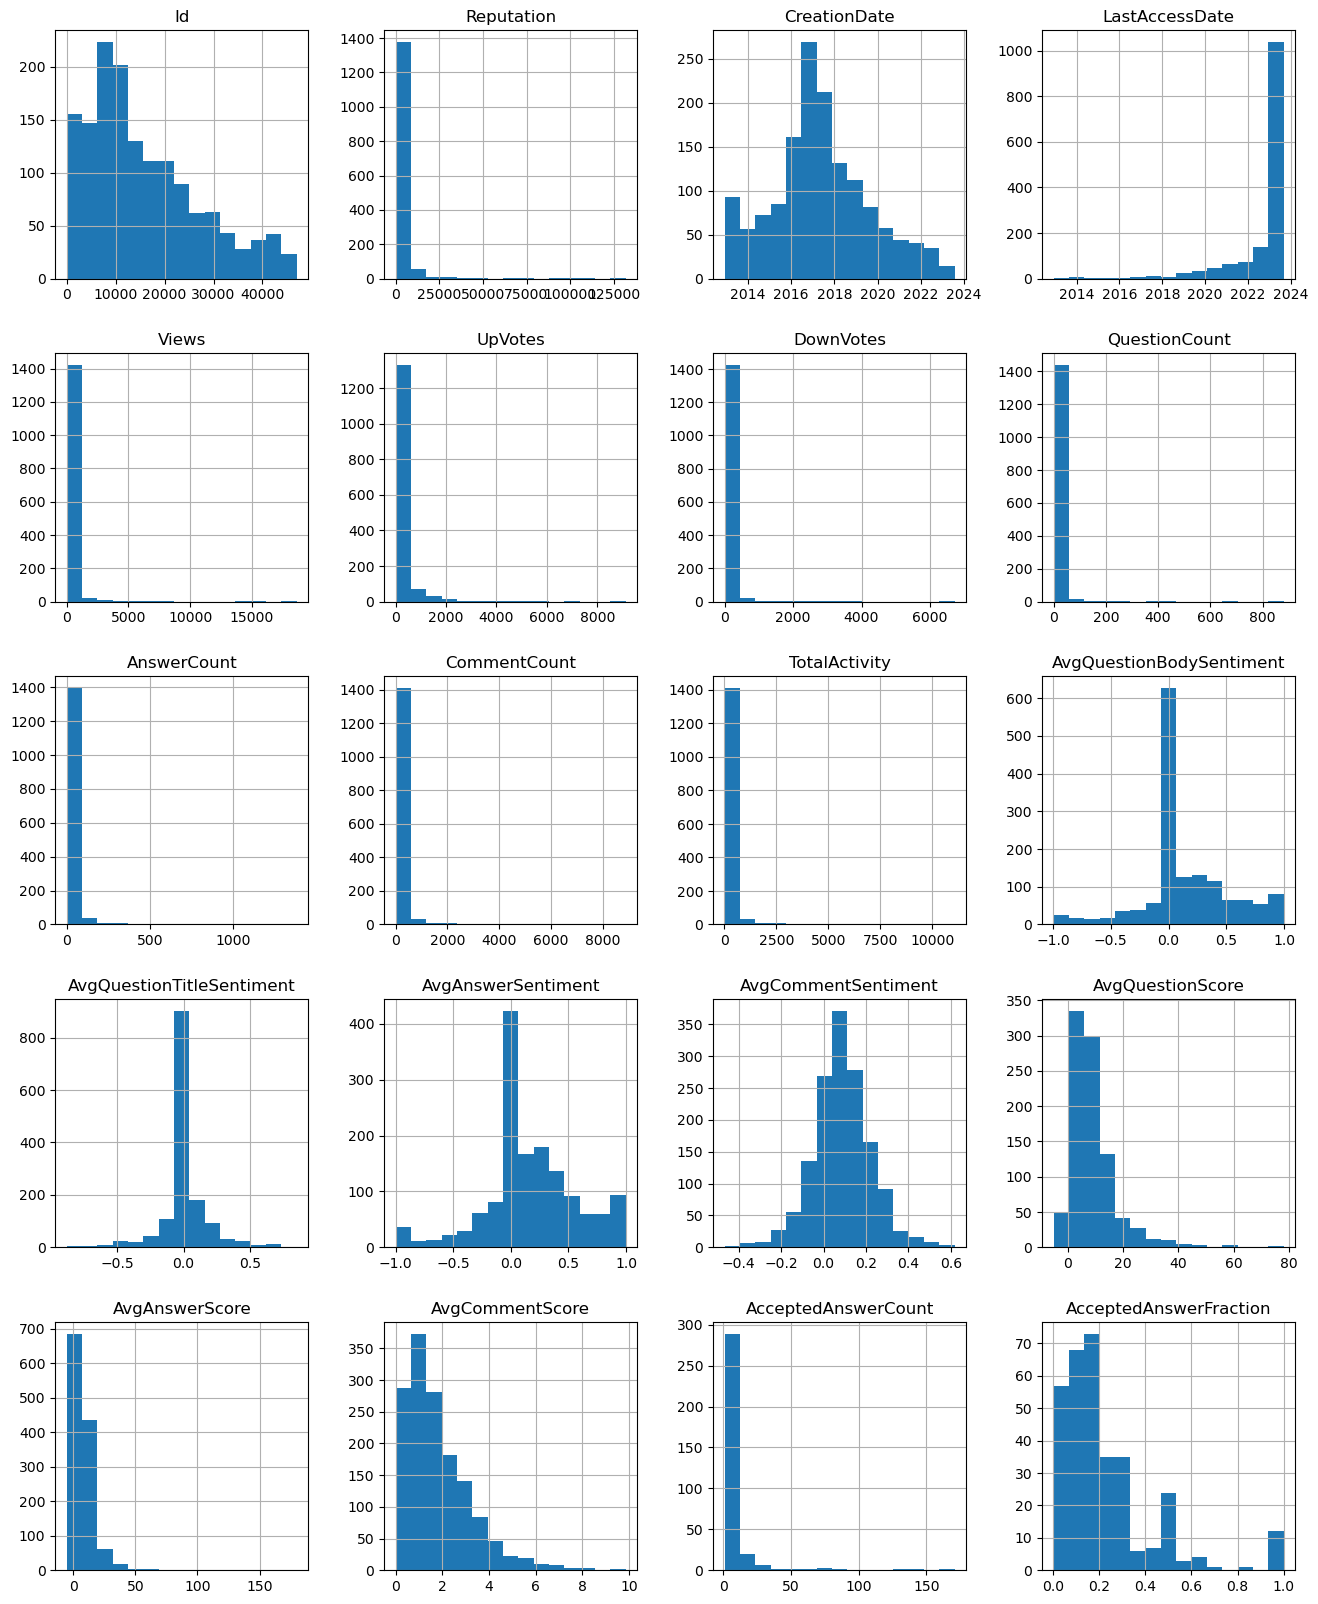

In [4]:
# Display a histogram of each column in the dataframe
users_with_attributes.hist(bins=15, figsize=(16, 20))

plt.show()

In [5]:
users_with_attributes.isnull().sum()

Id                              0
Reputation                      0
CreationDate                    0
LastAccessDate                  0
Views                           0
UpVotes                         0
DownVotes                       0
QuestionCount                   0
AnswerCount                     0
CommentCount                    0
TotalActivity                   0
AvgQuestionBodySentiment        0
AvgQuestionTitleSentiment       0
AvgAnswerSentiment              0
AvgCommentSentiment             0
AvgQuestionScore              540
AvgAnswerScore                253
AvgCommentScore                 0
AcceptedAnswerCount          1138
AcceptedAnswerFraction       1138
dtype: int64

In [6]:
users_with_attributes[users_with_attributes['AvgQuestionScore'].isnull()]

,Id,Reputation,CreationDate,LastAccessDate,Views,UpVotes,DownVotes,QuestionCount,AnswerCount,CommentCount,TotalActivity,AvgQuestionBodySentiment,AvgQuestionTitleSentiment,AvgAnswerSentiment,AvgCommentSentiment,AvgQuestionScore,AvgAnswerScore,AvgCommentScore,AcceptedAnswerCount,AcceptedAnswerFraction
5,5,315,2012-12-04 20:36:06.517,2021-07-05 18:03:41.037,49,14,58,0.0,3.0,31.0,34.0,0.0,0.0,0.185433,0.469406,NaN,7.000000,1.193548,1.0,0.333333
8,8,2777,2012-12-04 20:52:37.450,2022-07-31 22:39:03.850,832,37,5,0.0,13.0,10.0,23.0,0.0,0.0,0.689277,0.049030,NaN,20.230769,1.500000,7.0,0.538462
29,29,526,2012-12-04 21:58:26.580,2020-07-20 22:29:05.523,20,41,3,0.0,4.0,17.0,21.0,0.0,0.0,0.800400,0.173418,NaN,13.000000,0.470588,1.0,0.250000
73,75,1937,2012-12-04 23:45:01.397,2023-06-16 19:48:12.903,85,59,12,0.0,11.0,68.0,79.0,0.0,0.0,0.036382,-0.000501,NaN,9.272727,2.338235,2.0,0.181818
98,103,869,2012-12-05 05:47:19.967,2023-06-21 00:15:06.513,60,47,18,0.0,5.0,52.0,57.0,0.0,0.0,0.087260,0.070679,NaN,14.600000,2.557692,1.0,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35929,44167,273,2022-08-21 06:32:33.133,2023-07-25 19:06:17.360,130,97,1,0.0,7.0,77.0,84.0,0.0,0.0,-0.200457,-0.008800,NaN,-0.285714,0.480519,NaN,NaN
35971,44212,1579,2022-08-26 15:44:12.947,2023-09-02 23:04:20.047,19,13,10,0.0,26.0,35.0,61.0,0.0,0.0,0.368450,0.135931,NaN,5.538462,1.685714,NaN,NaN
36172,44418,261,2022-09-21 20:04:07.540,2023-09-02 20:28:45.480,6,2,0,0.0,1.0,21.0,22.0,0.0,0.0,-0.119700,0.013300,NaN,16.000000,6.809524,NaN,NaN
36339,44614,318,2022-10-12 13:31:21.210,2023-08-31 16:05:16.080,5,1,0,0.0,3.0,16.0,19.0,0.0,0.0,0.331267,0.248269,NaN,-0.333333,0.187500,NaN,NaN


In [7]:
def custom_cluster(target_dataframe, clustering_features, n_clusters, cluster_label, random_state=42):
    # Impute NaN values
    clustering_features_imputed = target_dataframe[clustering_features].fillna(0)

    # Feature scaling
    scaler = StandardScaler()
    scaled_clustering_features = scaler.fit_transform(clustering_features_imputed)

    # Elbow method
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=random_state)
        kmeans.fit(scaled_clustering_features)
        wcss.append(kmeans.inertia_)

    plt.figure()
    plt.plot(range(1, 11), wcss)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Within-Cluster Sum of Squares')
    plt.grid(True)
    plt.show()

    # Silhouette analysis
    silhouette_scores = []
    for i in range(2, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=random_state)
        kmeans.fit(scaled_clustering_features)
        silhouette_avg = silhouette_score(scaled_clustering_features, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

    plt.figure()
    plt.plot(range(2, 11), silhouette_scores)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()

    # KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=random_state)
    kmeans.fit(scaled_clustering_features)

    # Add cluster labels to dataframe
    target_dataframe[cluster_label] = kmeans.labels_

    # Display cluster information
    cluster_counts = target_dataframe[cluster_label].value_counts()
    cluster_stats = target_dataframe.groupby(cluster_label)[clustering_features].mean()
    
    print(cluster_counts)
    print("")
    print(cluster_stats)

### 1. Clustering by Activity Metrics

#### 1.1 Clustering by question count, answer count, and comment count

In [8]:
users_with_attributes.columns

Index(['Id', 'Reputation', 'CreationDate', 'LastAccessDate', 'Views',
       'UpVotes', 'DownVotes', 'QuestionCount', 'AnswerCount', 'CommentCount',
       'TotalActivity', 'AvgQuestionBodySentiment',
       'AvgQuestionTitleSentiment', 'AvgAnswerSentiment',
       'AvgCommentSentiment', 'AvgQuestionScore', 'AvgAnswerScore',
       'AvgCommentScore', 'AcceptedAnswerCount', 'AcceptedAnswerFraction'],
      dtype='object')

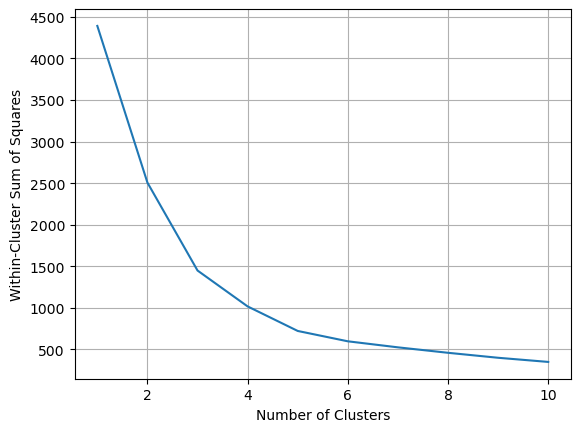

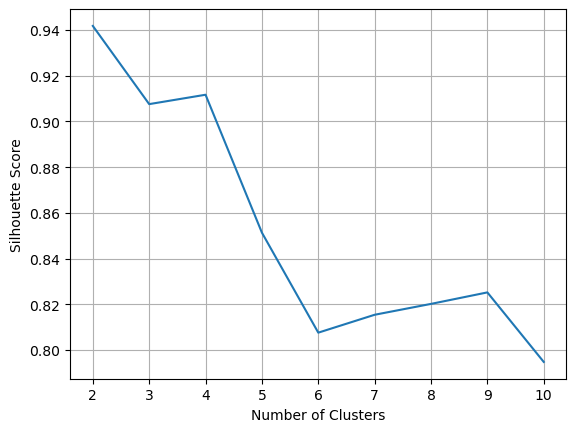

cluster1.1
0    1426
2      27
3       9
1       2
Name: count, dtype: int64

            QuestionCount  AnswerCount  CommentCount
cluster1.1                                          
0                4.528050    12.411641     71.998597
1              772.000000  1350.500000   6925.500000
2               29.000000   399.925926   1592.962963
3              294.555556    52.666667    845.555556


In [9]:
clustering_features = ['QuestionCount', 'AnswerCount', 'CommentCount']

custom_cluster(users_with_attributes, clustering_features, 4, 'cluster1.1')

### 2. Clustering by Quality and Reputation Metrics

#### 2.1 Clustering by reputation, average question score, average answer score, and average comment score

In [10]:
users_with_attributes.columns

Index(['Id', 'Reputation', 'CreationDate', 'LastAccessDate', 'Views',
       'UpVotes', 'DownVotes', 'QuestionCount', 'AnswerCount', 'CommentCount',
       'TotalActivity', 'AvgQuestionBodySentiment',
       'AvgQuestionTitleSentiment', 'AvgAnswerSentiment',
       'AvgCommentSentiment', 'AvgQuestionScore', 'AvgAnswerScore',
       'AvgCommentScore', 'AcceptedAnswerCount', 'AcceptedAnswerFraction',
       'cluster1.1'],
      dtype='object')

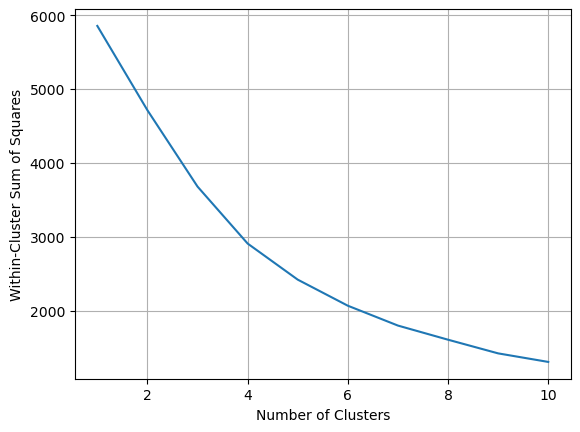

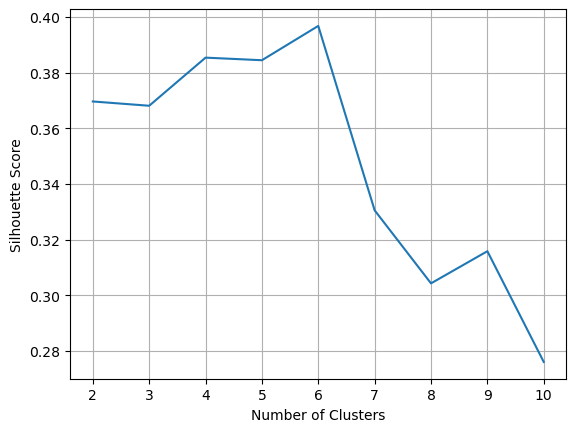

cluster2.1
1    934
3    409
2    105
0     16
Name: count, dtype: int64

              Reputation  AvgQuestionScore  AvgAnswerScore  AvgCommentScore
cluster2.1                                                                 
0           74118.812500         10.385368       11.852085         1.729446
1            1710.002141          6.682945        4.981177         1.043005
2            2632.095238         29.546801        9.559383         2.368631
3            2223.853301          7.573918       15.665143         3.436663


In [20]:
clustering_features = ['Reputation', 'AvgQuestionScore', 'AvgAnswerScore', 'AvgCommentScore']

custom_cluster(users_with_attributes, clustering_features, 4, 'cluster2.1')

#### 2.2 Clustering by accepted answer count and accepted answer fraction

In [12]:
users_with_attributes.columns

Index(['Id', 'Reputation', 'CreationDate', 'LastAccessDate', 'Views',
       'UpVotes', 'DownVotes', 'QuestionCount', 'AnswerCount', 'CommentCount',
       'TotalActivity', 'AvgQuestionBodySentiment',
       'AvgQuestionTitleSentiment', 'AvgAnswerSentiment',
       'AvgCommentSentiment', 'AvgQuestionScore', 'AvgAnswerScore',
       'AvgCommentScore', 'AcceptedAnswerCount', 'AcceptedAnswerFraction',
       'cluster1.1', 'cluster2.1'],
      dtype='object')

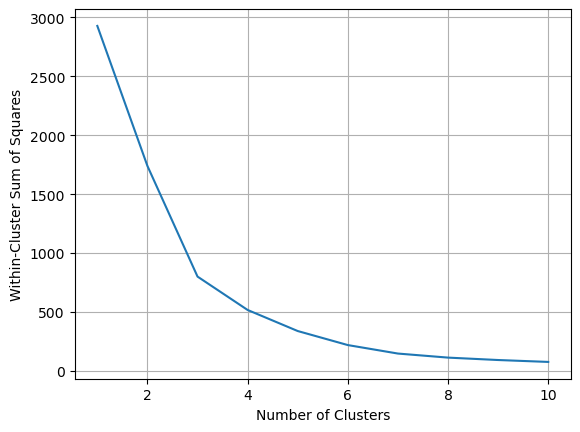

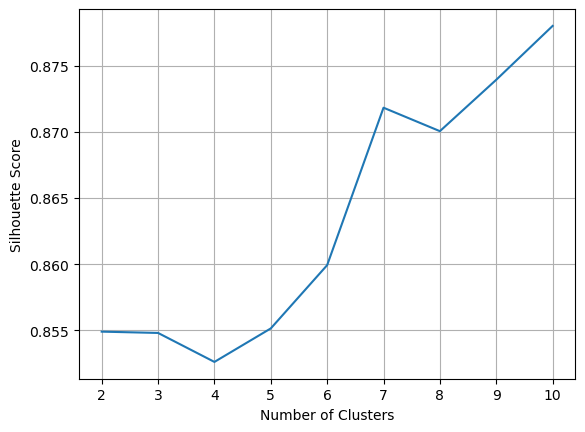

cluster2.2
0    1334
1     120
2      10
Name: count, dtype: int64

            AcceptedAnswerCount  AcceptedAnswerFraction
cluster2.2                                             
0                      3.505102                0.112406
1                      5.166667                0.440166
2                     93.500000                0.178602


In [13]:
clustering_features = ['AcceptedAnswerCount', 'AcceptedAnswerFraction']

custom_cluster(users_with_attributes, clustering_features, 3, 'cluster2.2')

### 3. Clustering by Sentiment Metrics

#### 3.1 Clustering by average question body sentiment, average question title sentiment, average answer sentiment, average comment sentiment

In [14]:
users_with_attributes.columns

Index(['Id', 'Reputation', 'CreationDate', 'LastAccessDate', 'Views',
       'UpVotes', 'DownVotes', 'QuestionCount', 'AnswerCount', 'CommentCount',
       'TotalActivity', 'AvgQuestionBodySentiment',
       'AvgQuestionTitleSentiment', 'AvgAnswerSentiment',
       'AvgCommentSentiment', 'AvgQuestionScore', 'AvgAnswerScore',
       'AvgCommentScore', 'AcceptedAnswerCount', 'AcceptedAnswerFraction',
       'cluster1.1', 'cluster2.1', 'cluster2.2'],
      dtype='object')

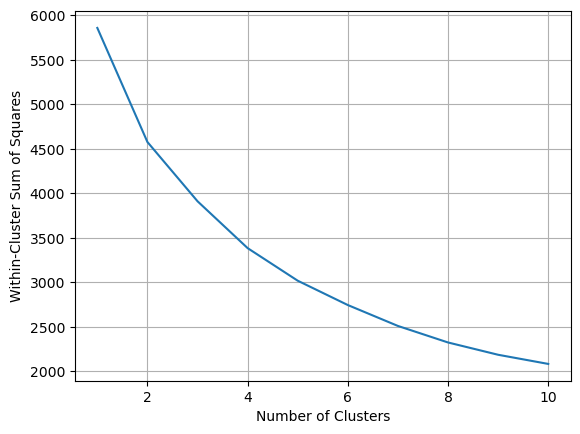

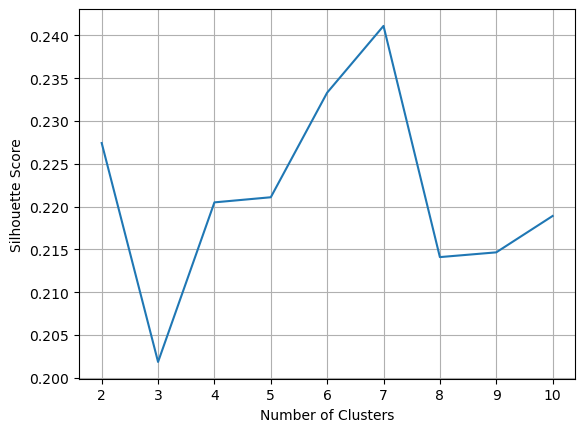

cluster3.1
2    501
5    319
1    277
3    220
4     81
0     66
Name: count, dtype: int64

            AvgQuestionBodySentiment  AvgQuestionTitleSentiment  \
cluster3.1                                                        
0                          -0.581585                  -0.447926   
1                           0.120674                   0.031371   
2                           0.002360                  -0.001223   
3                           0.668676                   0.012328   
4                           0.676958                   0.413948   
5                           0.031535                  -0.002140   

            AvgAnswerSentiment  AvgCommentSentiment  
cluster3.1                                           
0                    -0.005366             0.031510  
1                     0.129338             0.253241  
2                    -0.091112            -0.000984  
3                     0.185258             0.102717  
4                     0.291620             0.13

In [15]:
clustering_features = ['AvgQuestionBodySentiment', 'AvgQuestionTitleSentiment', 'AvgAnswerSentiment', 'AvgCommentSentiment']

custom_cluster(users_with_attributes, clustering_features, 4, 'cluster3.1')

### 4. Clustering by Engagement Metrics

#### 4.1 Clustering by views, upvotes, and downvotes

In [16]:
users_with_attributes.columns

Index(['Id', 'Reputation', 'CreationDate', 'LastAccessDate', 'Views',
       'UpVotes', 'DownVotes', 'QuestionCount', 'AnswerCount', 'CommentCount',
       'TotalActivity', 'AvgQuestionBodySentiment',
       'AvgQuestionTitleSentiment', 'AvgAnswerSentiment',
       'AvgCommentSentiment', 'AvgQuestionScore', 'AvgAnswerScore',
       'AvgCommentScore', 'AcceptedAnswerCount', 'AcceptedAnswerFraction',
       'cluster1.1', 'cluster2.1', 'cluster2.2', 'cluster3.1'],
      dtype='object')

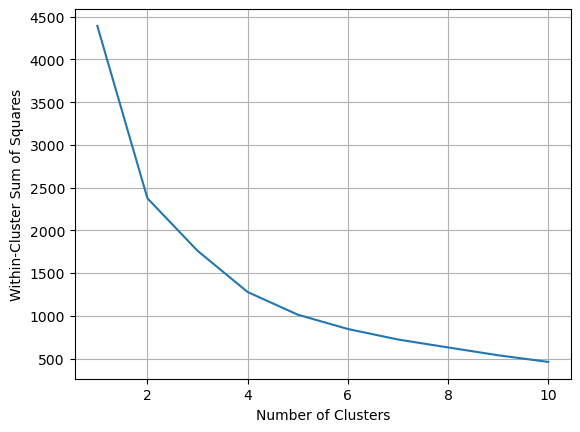

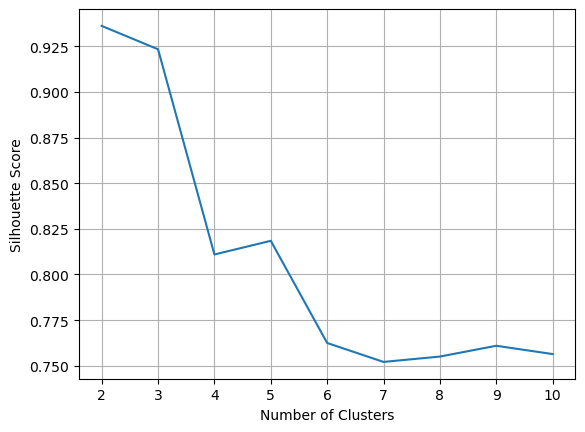

cluster4.1
0    1442
1      19
2       3
Name: count, dtype: int64

                   Views      UpVotes    DownVotes
cluster4.1                                        
0             172.524272   181.113731    35.974341
1            2459.000000  4067.263158  2151.631579
2           16289.666667  2253.000000  1542.333333


In [17]:
clustering_features = ['Views', 'UpVotes', 'DownVotes']

custom_cluster(users_with_attributes, clustering_features, 3, 'cluster4.1')

### Correlation between Clusters

In [18]:
correlation_matrix = users_with_attributes.iloc[:, -5:].corr()

correlation_matrix

,cluster1.1,cluster2.1,cluster2.2,cluster3.1,cluster4.1
cluster1.1,1.000000,-0.147128,0.194007,-0.060276,0.405234
cluster2.1,-0.147128,1.000000,-0.075815,0.095657,-0.091492
cluster2.2,0.194007,-0.075815,1.000000,0.020025,0.113655
cluster3.1,-0.060276,0.095657,0.020025,1.000000,-0.049511
cluster4.1,0.405234,-0.091492,0.113655,-0.049511,1.000000
